In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import tqdm
from time import sleep
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2

from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name

In [2]:
from matplotlib.patches import Circle, Rectangle, Arc

# Amazing function by Bradley Fay for plotting the nba court
# source: https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb
def draw_court(ax=None, color='black', lw=2, background_color="#EBEBE8", outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False, zorder=0)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed', zorder=0)
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color, zorder=0)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 138, linewidth=lw,
                               color=color, zorder=0)
    corner_three_b = Rectangle((220, -47.5), 0, 138, linewidth=lw, color=color, zorder=0)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color, zorder=0)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]
    
    # Draw the half court line, baseline and side out bound lines
    outer_lines = Rectangle((-249, -48), 498, 469, linewidth=lw,
                            color=color, fill=None)
    court_elements.append(outer_lines)
    outer_lines_fill = Rectangle((-249, -48), 498, 470, linewidth=lw,
                            color=background_color, fill=True, zorder=-2)
    court_elements.append(outer_lines_fill)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [3]:
lebron_id = find_players_by_full_name('LeBron James')[0]['id']

In [4]:
seasons = [f"{season}-{str(season+1)[-2:]}" for season in range(2003, 2020)]

In [14]:
assist_data_frames = []
for season in tqdm.tqdm(seasons, desc='Iterating Seasons...'):
    season_assists = []
    game_finder = LeagueGameFinder(player_id_nullable=lebron_id, player_or_team_abbreviation='P', season_nullable=season)
    games_df = game_finder.get_data_frames()[0]
    unique_game_ids = games_df.GAME_ID.unique()
    for game_id in tqdm.tqdm(unique_game_ids, desc='Iterating Games...'):
        pbp_df = PlayByPlayV2(game_id=game_id).get_data_frames()[0]
        pbp_df = pbp_df.loc[(pbp_df.PLAYER2_ID == lebron_id) & (pbp_df.EVENTMSGTYPE == 1)]
        season_assists.append(pbp_df)
        sleep(1)
    assist_data_frames.append(pd.concat(season_assists, ignore_index=True))

Iterating Games...:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 74/81 [02:16<00:12,  1.77s/it]


Iterating Games...:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 67/84 [02:00<00:29,  1.73s/it]


Iterating Games...:  58%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 57/98 [01:46<01:20,  1.97s/it]


Iterating Games...:  31%|████████████████████████████████████████████████▍                                                                                                         | 33/105 [00:58<02:00,  1.67s/it]


Iterating Games...:   2%|███▎                                                                                                                                                        | 2/96 [00:03<02:54,  1.86s/it]


Iterating Games...:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 78/96 [02:25<00:31,  1.77s/it]


Iterating Games...:  54%|███████████████████████████████████████████████████████████████████████████████████▋                                                                      | 56/103 [01:45<01:29,  1.91s/it]


Iterating Games...:  29%|████████████████████████████████████████████▌                                                                                                              | 27/94 [00:48<02:02,  1.83s/it]


Iterating Games...:   7%|██████████▏                                                                                                                                                | 7/107 [00:11<02:48,  1.68s/it]


Iterating Games...:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 83/107 [02:29<00:42,  1.77s/it]


Iterating Games...:  57%|████████████████████████████████████████████████████████████████████████████████████████                                                                   | 50/88 [01:41<01:05,  1.73s/it]


Iterating Games...:  32%|█████████████████████████████████████████████████▌                                                                                                        | 36/112 [01:05<02:06,  1.66s/it]


Iterating Games...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [03:20<00:00,  1.79s/it]


Iterating Games...:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 74/104 [02:12<00:51,  1.71s/it]


Iterating Games...:  46%|███████████████████████████████████████████████████████████████████████▊                                                                                   | 44/95 [01:18<01:25,  1.68s/it]


Iterating Games...:  23%|███████████████████████████████████▍                                                                                                                      | 23/100 [00:42<02:24,  1.88s/it]


Iterating Games...:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 99/100 [02:59<00:01,  1.88s/it]


Iterating Games...:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 73/96 [02:09<00:40,  1.75s/it]


Iterating Games...:  48%|██████████████████████████████████████████████████████████████████████████                                                                                | 51/106 [01:28<01:33,  1.70s/it]


Iterating Games...:  32%|█████████████████████████████████████████████████                                                                                                          | 19/60 [00:35<01:11,  1.74s/it]


Iterating Games...:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 33/48 [00:56<00:24,  1.64s/it]


Iterating Seasons...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [48:25<00:00, 170.89s/it]


In [16]:
all_assist_frames = pd.concat(assist_data_frames, ignore_index=True)

In [5]:
all_assist_frames.to_csv('all_lbj_ast.csv')

NameError: name 'all_assist_frames' is not defined

In [5]:
all_assist_frames = pd.read_csv('all_lbj_ast.csv')

In [6]:
cle_id = find_teams_by_full_name('Cleveland Cavaliers')[0]['id']
miami_id = find_teams_by_full_name('Miami Heat')[0]['id']
lakers_id = find_teams_by_full_name('Los Angeles Lakers')[0]['id']

In [7]:
seasons_teams = {
    '2003-04': cle_id,
    '2004-05': cle_id,
    '2005-06': cle_id,
    '2006-07': cle_id,
    '2007-08': cle_id,
    '2008-09': cle_id,
    '2009-10': cle_id,
    '2010-11': miami_id,
    '2011-12': miami_id,
    '2012-13': miami_id,
    '2013-14': miami_id,
    '2014-15': cle_id,
    '2015-16': cle_id,
    '2016-17': cle_id,
    '2017-18': cle_id,
    '2018-19': lakers_id,
    '2019-20': lakers_id
}

In [8]:
season_data_frames = []

for season in tqdm.tqdm(seasons_teams, desc='Loading'):
    shot_data = ShotChartDetail(team_id=seasons_teams[season], player_id=0, season_nullable=season)
    shots_df = shot_data.get_data_frames()[0]
    shots_df = shots_df.loc[shots_df.SHOT_MADE_FLAG == 1]
    shots_df = shots_df.loc[shots_df.PLAYER_ID != lebron_id]
    shots_df.LOC_X = -shots_df.LOC_X
    shots_df.loc[:, 'SEASON'] = season
    season_data_frames.append(shots_df)
    sleep(1)

Loading: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [01:00<00:00,  3.56s/it]


In [9]:
concated_shots = pd.concat(season_data_frames, ignore_index=True)

In [10]:
all_assist_frames = all_assist_frames.drop(columns=['Unnamed: 0'])

In [11]:
concated_shots.GAME_ID = concated_shots.GAME_ID.astype('int64')

In [12]:
merged_df = pd.merge(left=concated_shots, right=all_assist_frames, left_on=['GAME_ID', 'GAME_EVENT_ID'], right_on=['GAME_ID', 'EVENTNUM'], suffixes=('_shot', '_assist'))

In [13]:
colors =[
    "#6f263d",
    "#6f263d",
    "#6f263d",
    "#6f263d",
    "#6f263d",
    "#6f263d",
    "#6f263d",
    "#000000",
    "#000000",
    "#000000",
    "#000000",
    "#6f263d",
    "#6f263d",
    "#6f263d",
    "#6f263d",
    "#552583",
    "#552583"
]

In [14]:
from matplotlib.animation import FuncAnimation

In [15]:
data_frame = merged_df


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [07:18<00:00, 25.81s/it]


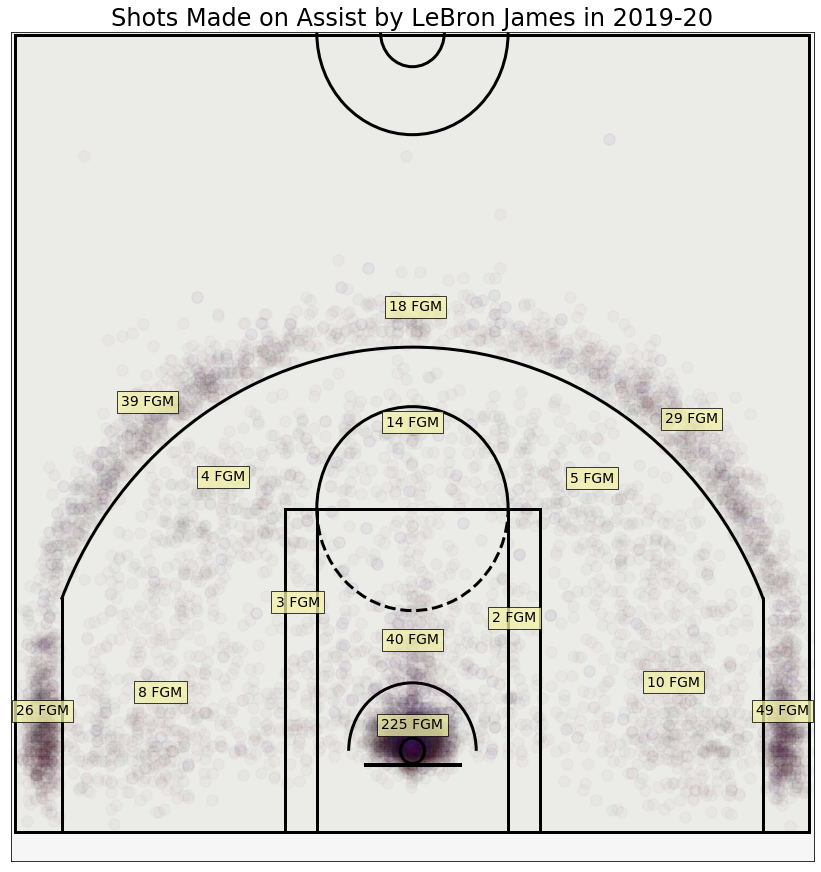

In [21]:
fig, ax = plt.subplots(figsize=(12, 12))
draw_court(ax=ax,outer_lines=True, lw=3)

for index in tqdm.tqdm(range(len(seasons))):

    def plot_shot_chart(frame):

        ax.clear()

        #index = frame // 60
        mod = frame % 60

        season = seasons[index]
        color = colors[index]
        edge_color = '#222222'
        #print(index)
        i=0
        while i < index:
            curr_season = data_frame.loc[data_frame.SEASON == seasons[i]]
            color = colors[i]
            made_shots = curr_season.loc[curr_season.SHOT_MADE_FLAG == 1]
            alpha=0.025
            paths = ax.scatter(
                x=made_shots.LOC_X,
                y=made_shots.LOC_Y,
                marker='o',
                c=color,
                s=125,
                alpha=alpha,
                edgecolors=edge_color,
                linewidths=1.5
            )
            i+=1


        curr_season = data_frame.loc[data_frame.SEASON == seasons[index]]
        color = colors[index]
        made_shots = curr_season.loc[curr_season.SHOT_MADE_FLAG == 1]

        alpha = (mod+1) * 0.052
        if mod > 18:
            alpha = 1.0
        if mod > 40:
            alpha = 1.0 - (mod - 40) *  0.052

        paths = ax.scatter(
            x=made_shots.LOC_X,
            y=made_shots.LOC_Y,
            marker='o',
            c=color,
            s=125,
            alpha=alpha,
            edgecolors=edge_color,
            linewidths=1.5
        )


        original_df = data_frame.loc[data_frame.SEASON == seasons[index]]
        df_by_zone_sum = original_df.groupby(by=['SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA']).sum()
        df_by_zone_sum.loc[:, 'ZONE_PCT'] = (df_by_zone_sum.SHOT_MADE_FLAG / df_by_zone_sum.SHOT_ATTEMPTED_FLAG) * 100
        df_by_zone_median = data_frame.groupby(by=['SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA']).median()
        for cur_indx in range(len(df_by_zone_median)):
            loc_x = df_by_zone_median.iloc[cur_indx].LOC_X
            loc_y = df_by_zone_median.iloc[cur_indx].LOC_Y
            name = df_by_zone_median.iloc[cur_indx].name
            try:
                zone_percentage = df_by_zone_sum.loc[name].ZONE_PCT
                zone_shots_made = df_by_zone_sum.loc[name].SHOT_MADE_FLAG
                zone_shots_attempted = df_by_zone_sum.loc[name].SHOT_ATTEMPTED_FLAG
                ax.text(x=loc_x, y=loc_y+10, s=f"{int(zone_shots_made)} FGM", ha='center', c='black',
                       bbox={'facecolor': '#F3F3A9', 'alpha': 0.75, 'edgecolor': 'black'}, fontsize=14)
            except Exception:
                continue


        if mod >=55 and index < len(seasons)-1:
            curr_season = data_frame.loc[data_frame.SEASON == seasons[index+1]]
            made_shots = curr_season.loc[curr_season.SHOT_MADE_FLAG == 1]
            color = colors[index+1]
            alpha=0.01 * (mod - 55 + 1)
            paths = ax.scatter(
                x=made_shots.LOC_X,
                y=made_shots.LOC_Y,
                marker='o',
                c=color,
                s=125,
                alpha=alpha,
                edgecolors=edge_color,
                linewidths=1.5
            )

        # Changing court color
        ax.set_facecolor('#F6F6F6')

        #plt.xticks(np.arange(-250, 251, 20))
        #plt.yticks(np.arange(-50, 490, 20))
        # Removing ticks
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        ax.grid(False)

        # Title
        plt.title(f"Shots Made on Assist by LeBron James in {seasons[index]}", size=24)
        draw_court(ax=ax,outer_lines=True, lw=3)

        # Drawing court
        ax.set_xlim(-252,252)
        ax.set_ylim(-65,423)


    fig.subplots_adjust(left=0.03, bottom=0, right=0.96, top=0.96, wspace=None, hspace=None)

    animation = FuncAnimation(fig=fig, func=plot_shot_chart, frames=60, interval=33.3333, repeat_delay=3000)
    animation.save(f"lebron_all/assists_{seasons[index]}.gif", writer='imagemagick')
